In [1]:
# importing the base packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing openpyxl(required optional dependancy)
import sys
!conda install --yes --prefix {sys.prefix} openpyxl

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [4]:
# read the train xlsx file 
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# checking no of rows and cols
train_df.shape

(10683, 11)

In [6]:
# checking the df dtypes
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
# checking for missing values
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# since only 2 values r missing, dropping the row with missing val
train_df.dropna(inplace=True)
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_df.shape

(10682, 11)

### data-cleaning and feature engineering

In [10]:
# train_df columns
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
# converting the date related cols(Date_of_Journey, Dep_Time, Arrival_Time)  into dataTime object
def col_to_dateTime(col):
    train_df[col] = pd.to_datetime(train_df[col])

column = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']

for col in column:
    col_to_dateTime(col)

In [12]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
max_val = train_df.Date_of_Journey.max()
max_val

Timestamp('2019-12-06 00:00:00')

In [14]:
# since the date_of_journey year is within 1 year of time frame, which does not match dep_time and Arrival_time year's time frame, so ignoring the year. let's extract only day and month from dt object
train_df['Day_of_Journey'] = train_df['Date_of_Journey'].dt.day
train_df['month_of_Journey'] = train_df['Date_of_Journey'].dt.month
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-10-13 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-13 05:50:00,2022-10-13 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [15]:
# droping the Day_of_Journey col
train_df.drop('Date_of_Journey', axis=1, inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-13 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-13 05:50:00,2022-10-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-13 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-10-13 18:05:00,2022-10-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-10-13 16:50:00,2022-10-13 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
# extractng the hour and minutes from (Dep_Time, Arrival_Time) and ignoring the date
def hour_minute(col):
    train_df[col+'_hour'] = train_df[col].dt.hour
    train_df[col+'_min'] = train_df[col].dt.minute
    
    
# convert both (Dep_Time, Arrival_Time) cols
hour_minute('Dep_Time')
hour_minute('Arrival_Time')

In [17]:
# checking and droping the (Dep_Time, Arrival_Time) cols
train_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-13 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-13 05:50:00,2022-10-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [18]:
train_df.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [19]:
train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [20]:
train_df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Day_of_Journey        int64
month_of_Journey      int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dtype: object

In [21]:
# extracting hr and min from duration col and convert it into int dtype
values = list(train_df['Duration'])
for i in range(len(values)):
    # check if both hr and min value is present. if so then do nothing
    if len(values[i].split(' ')) == 2:
        pass
    # based on the condition, add hr or min as per the condition to the value
    else:
        if 'h' in values[i]:
            values[i] = values[i] + ' 0m'
        else:
            values[i] = '0h ' + values[i]
            

In [22]:
train_df['Duration'] = values

In [23]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
# split hr and min from duration col
train_df['Duration_hour'] = train_df['Duration'].apply(lambda x: x.split(' ')[0][0:-1]).astype('int')

train_df['Duration_min'] = train_df['Duration'].apply(lambda x: x.split(' ')[1][0: -1]).astype('int')

In [25]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [26]:
train_df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Day_of_Journey        int64
month_of_Journey      int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour         int32
Duration_min          int32
dtype: object

In [27]:
train_df.drop('Duration', axis=1, inplace=True)

In [28]:
# processing object columns
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [29]:
# most of the value is 'No info' so dropping the column
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [30]:
train_df.drop('Additional_Info', axis=1, inplace=True)

In [31]:
train_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [32]:
# converting Total_Stops col into int-type col (doing LableEncoding since the column data is ordinal) 
map_dict = {'non-stop':0, '2 stops': 2, '1 stop': 1, '3 stops':3, '4 stops':4} 

train_df['Total_Stops'] = train_df['Total_Stops'].map(map_dict)

In [33]:
train_df.Total_Stops.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [34]:
train_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,25


In [35]:
train_df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops           int64
Price                 int64
Day_of_Journey        int64
month_of_Journey      int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour         int32
Duration_min          int32
dtype: object

In [36]:
# importing seaborn
import seaborn as sns

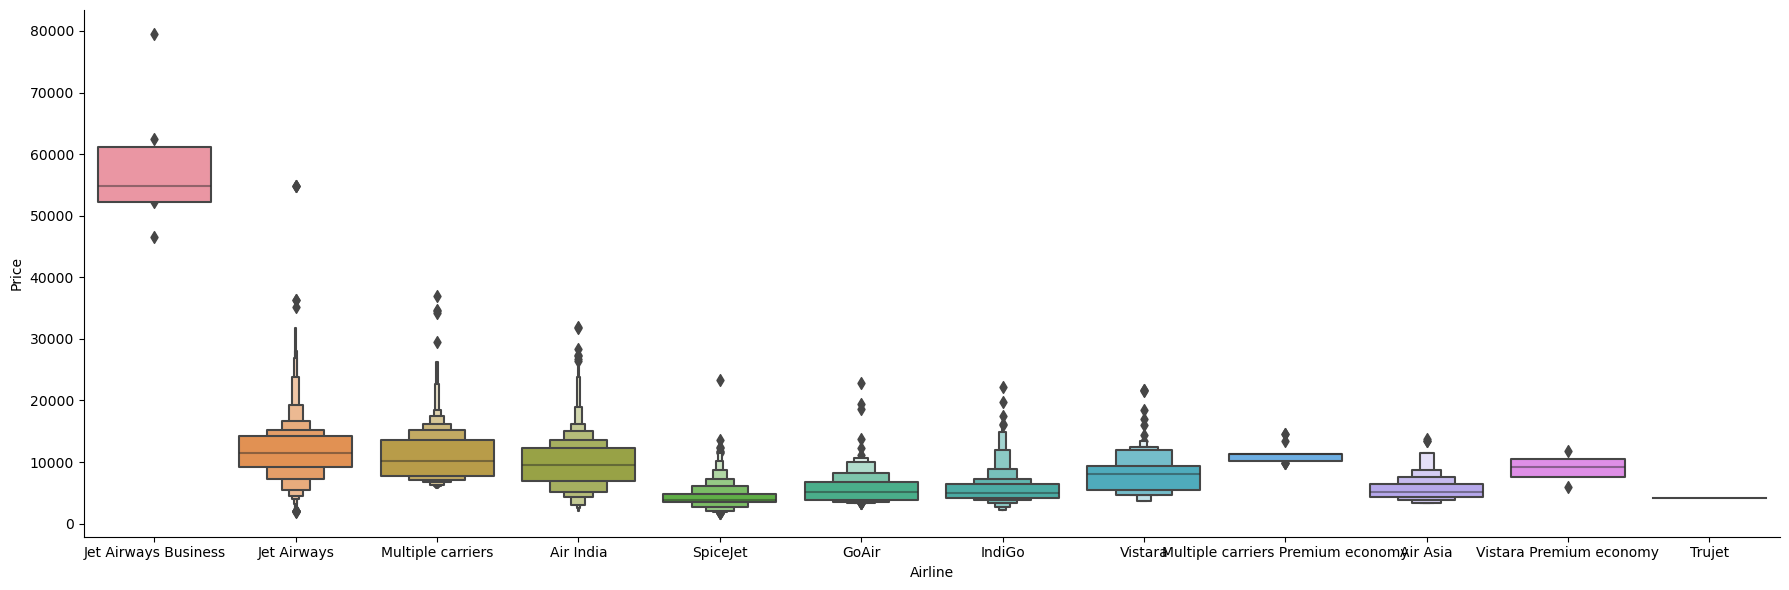

In [37]:
# visualizing the price for different AirlAirline using catplot()
sns.catplot(x='Airline', y='Price', data=train_df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3);

In [38]:
# since Airline column contains nominal data, encoding it with OneHotEncoding(using get_dummies)
Airline = train_df['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


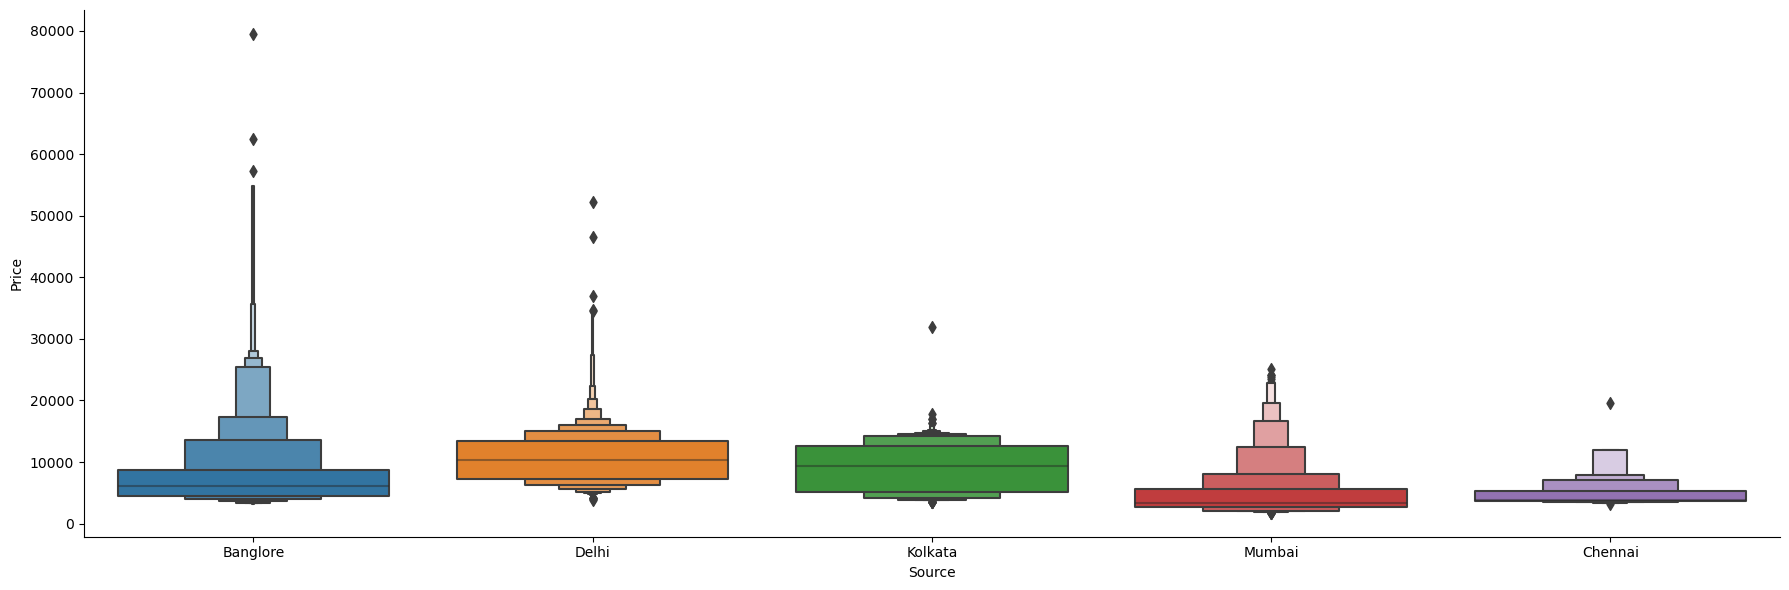

In [39]:
# Doing the same as above for Source
sns.catplot(x='Source', y='Price', data=train_df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3);

In [40]:
Source = train_df['Source']
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


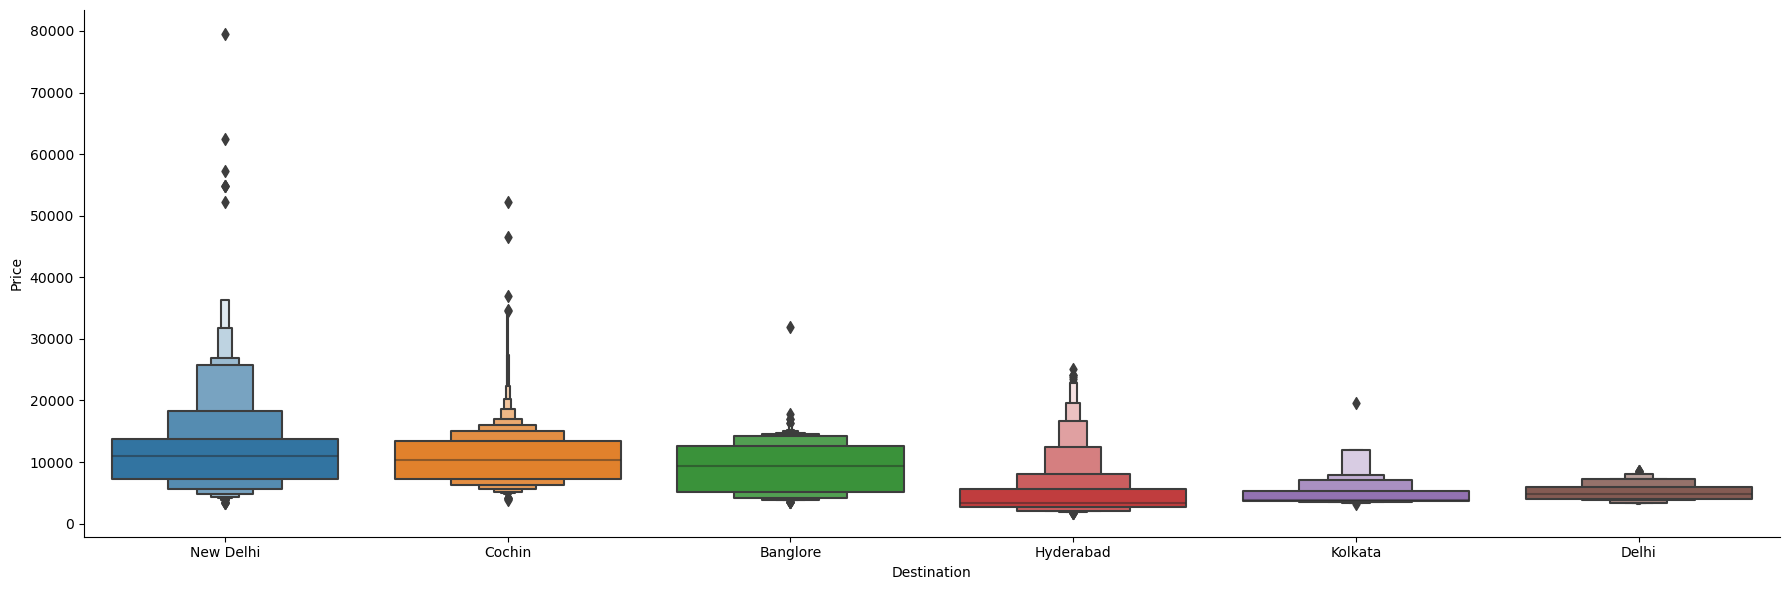

In [41]:
# encoding Destination
sns.catplot(x='Destination', y='Price', data=train_df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3);

In [42]:
Destination = train_df['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [43]:
# route 
train_df.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [44]:
# since Route also specifies how many stops been made, the same as total_stops dropping the Route column
train_df.drop('Route', axis=1, inplace=True)

In [45]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [46]:
# adding the encoded column to the train_df 
new_df = pd.concat([train_df, Airline, Source, Destination], axis=1)
pd.set_option('display.max_columns', None)
new_df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
# dropping the Airline, Source and Destination
new_df.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [48]:
new_df.head()

,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
new_df.dtypes

Total_Stops                          int64
Price                                int64
Day_of_Journey                       int64
month_of_Journey                     int64
Dep_Time_hour                        int64
Dep_Time_min                         int64
Arrival_Time_hour                    int64
Arrival_Time_min                     int64
Duration_hour                        int32
Duration_min                         int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata    

In [50]:
store_df = new_df.drop('Price', axis=1)

In [51]:
X = store_df
X.columns

Index(['Total_Stops', 'Day_of_Journey', 'month_of_Journey', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Duration_hour', 'Duration_min', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [52]:
y = new_df.iloc[:, 1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

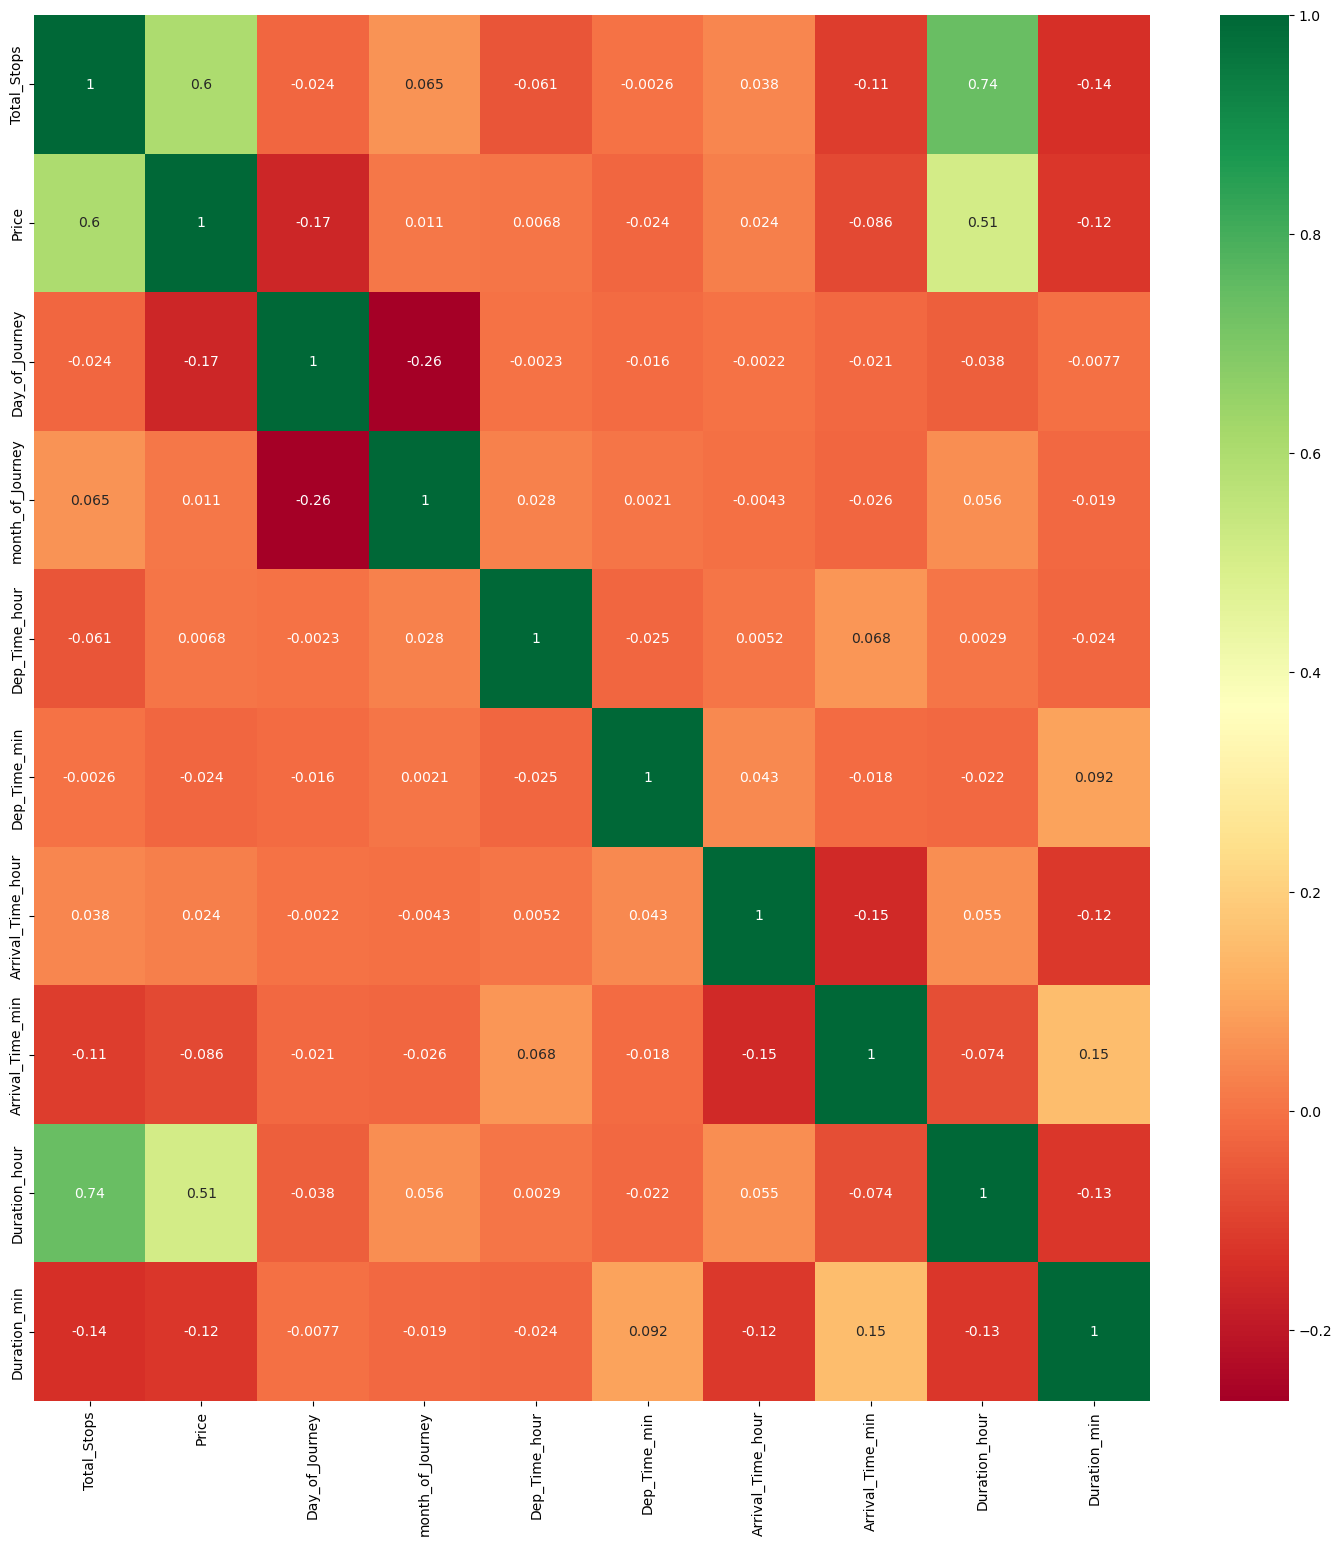

In [53]:
# finding correlation between independent and dependent variables

plt.figure(figsize=(18, 18))
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [54]:
# learn and should add 'ExtraTreesClassifier'


In [55]:
# modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

In [56]:
# fitting and scoring each model's performance
def model_score(X, y):
    # set the random seed
    np.random.seed(42)
    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # create an empty list to store the score
    result = []
    # creating dict with model name and instance of the model
    models = {'LinearRegression':LinearRegression(), 'Ridge':Ridge(), 'RandomForestRegressor':RandomForestRegressor()}
    
    # loop through each model
    for model_name, model in models.items():
        # define the steps for pipeline
        steps = [('StandardScaler', StandardScaler()), ('model_name', model)]
        pipeline = Pipeline(steps)
        # fit the model
        estimator = pipeline.fit(X_train, y_train)
        # score the model
        score = estimator.score(X_test, y_test)
        # append the score to the result
        result.append({model_name:score})
    
    return result

# calling the function    
model_score(X, y)

[{'LinearRegression': 0.6165516465946144},
 {'Ridge': 0.6165560859567889},
 {'RandomForestRegressor': 0.7892420123375274}]

In [57]:
# since RandomForestRegressor has a better score than other models, tuning the RandomForestRegressor using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

# set the random seed
np.random.seed(42)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the hyperparameter grid
grid = {
    'bootstrap': [True, False],
    'max_depth': [15, 80, 90, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300, 500]
}

# creating instance of RandomForestRegressor()
rf = RandomForestRegressor()

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = rf, param_distributions = grid, 
                          cv = 3, n_jobs = -1, verbose = 4)

# fitting the grid to the train data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [15, 80, 90, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   verbose=4)

In [58]:
# displaying the best parameters
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 80,
 'bootstrap': True}

In [59]:
# Reinstantiate the RandomForestRegressor
tuned_rf = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=80, bootstrap=True)
# fit the model
tuned_rf.fit(X_train, y_train)
# score the model
result = tuned_rf.score(X_test, y_test)

In [60]:
result

0.8053539485223896

In [61]:
predicted = tuned_rf.predict(X_test)

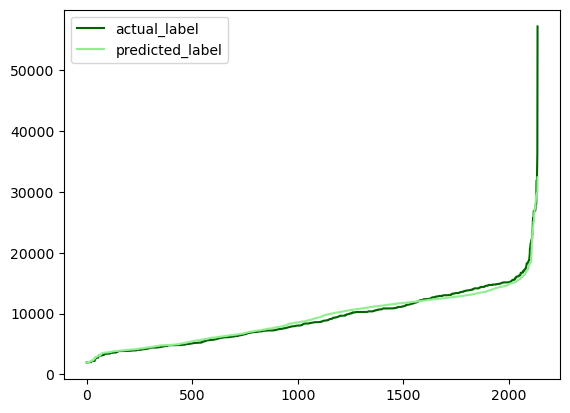

In [62]:
actual = np.sort(y_test)
predicted = np.sort(predicted)

plt.plot(actual, color='darkgreen', label='actual_label')
plt.plot(predicted, color='lightgreen', label='predicted_label')
plt.legend()
plt.show()

In [63]:
# trying hyper-parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# set the seed
np.random.seed(42)

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creating the grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# creating instance of RandomForestRegressor()
rf = RandomForestRegressor()

# GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# fitting the grid_search to train_data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [64]:
# printing best params
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [73]:
# setting the seed
np.random.seed(42)

# reinstantiating the RandomSearchCV
tuned_rf = RandomForestRegressor(n_estimators=300, min_samples_split=8, min_samples_leaf=3, max_depth=80, bootstrap=True)

# fit the model
tuned_rf.fit(X_train, y_train)

# score the model
grid_result = tuned_rf.score(X_test, y_test)

In [76]:
grid_result

0.8024586333429621

In [77]:
# the R^2 score is same for both grid_result and RandomSearchCV result score

In [82]:
# evaluating metrics
from sklearn.metrics import mean_squared_error
# MSE score
MSE = mean_squared_error(y_test, np.floor(predicted))
# Root Mean Squared Error score
RMSE = mean_squared_error(y_test, np.floor(predicted), squared=False)

In [83]:
# printing MSE and RMSE
print(f"the mean squared error is: {MSE}")
print()
print(f"the root mean squared error is: {RMSE}")

the mean squared error is: 40428351.48525971

the root mean squared error is: 6358.329299844395


In [85]:
# saving the model into a pickle file
import pickle
with open('flight_fare.pickle', 'wb') as f:
    pickle.dump(tuned_rf, f)

In [86]:
# loading the model and predicting the val
with open('flight_fare.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

In [88]:
predicted_val = loaded_model.predict(X_test)
predicted_val

array([16635.96293117,  6329.19184725,  8601.0306811 , ...,
        6706.69360938, 12371.56042168, 12705.12199683])

In [89]:
# printing R^2 score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_val)
r2_score

0.8024586333429621